In [1]:
# need to modify the function to accept binary scenes
# Issue: not sure if binary spectrum with different 
# coefficients/wavelengths and fluxes is a thing in dLux
# Check: Alpha Cen class.
# Indeed, alpha cen class comes with:
# log flux
# contrast
# position
# angle
# wavelengths
# weights
# etc. for both stars
# has functions which already get the correct x and y positions of each star
# correct (raw) fluxes
# etc.
import dLux as dl
import dLuxToliman as dlT
import dLux.utils as dlu
import jax.numpy as np

In [43]:
# constructing the telescope:
wf_npixels = 512 # nice and low res
diameter = 0.125
period = 304e-6
difference = np.pi

apertureLayer = dlT.TolimanApertureLayer(wf_npixels)

layers = [
    (
        'aperture',
        apertureLayer
    )
]

psf_npixels = 256
pixel_scale = 0.375
oversample = 4 # high level oversample

optics = dl.AngularOpticalSystem(wf_npixels,diameter,layers,psf_npixels,pixel_scale,oversample)

In [44]:
sources = dlT.AlphaCen(n_wavels=200)
telescope = dl.Telescope(optics, sources)
sidelobescope = dlT.SideLobeTelescope(telescope, period, difference)

In [45]:
center_wl = 585e-9
sidelobes = sidelobescope.model_sidelobes(wavelength = center_wl, corner = np.array([-1,-1]))

Model time: 15.1990 seconds.


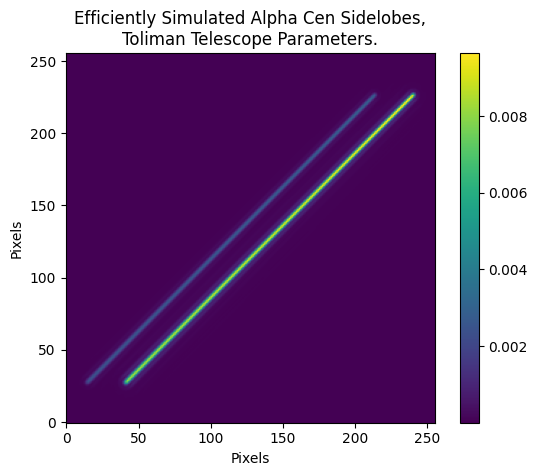

In [46]:
import matplotlib.pyplot as plt
plt.imshow(dlu.downsample(sidelobes,4),origin='lower')
plt.title('Efficiently Simulated Alpha Cen Sidelobes,\n'
          'Toliman Telescope Parameters.')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar()
plt.show()

In [50]:
pupilLayer = dlT.TolimanPupilLayer(wf_npixels)

layers2 = [
    (
        'aperture',
        apertureLayer
    ),
    (
        'pupil',
        pupilLayer
    )
]

optics2 = dl.AngularOpticalSystem(wf_npixels,diameter,layers2,psf_npixels,pixel_scale,oversample)
normalscope = dl.Telescope(optics2, sources)

psf = normalscope.model()

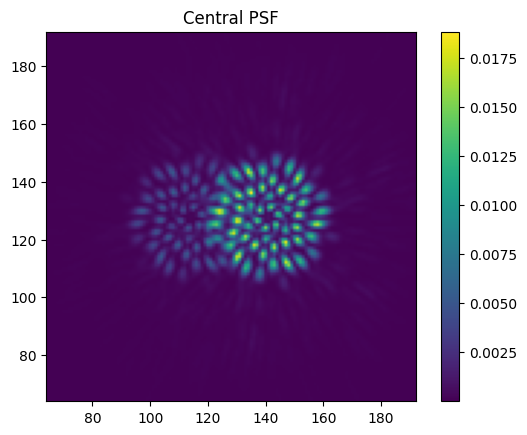

In [53]:
plt.imshow(dlu.downsample(psf,4),origin='lower')
plt.title('Central PSF')
plt.xlim(64,192)
plt.ylim(64,192)
plt.colorbar()
plt.show()